# Week3_HW
## 依照寄送方式探討訂單平均消費金額及交易狀態

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('../Orders.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5495276 entries, 0 to 5495275
Data columns (total 28 columns):
DateId                         int64
MemberId                       int64
OrderGroupCode                 object
TrackSourceTypeDef             object
TrackDeviceTypeDef             object
PayProfileTypeDef              object
SalesOrderSlaveId              int64
SalePageId                     int64
IsMajor                        bool
IsGift                         bool
IsSalePageGift                 bool
Quantity                       int64
UnitPrice                      float64
PromotionDiscount              float64
ECouponId                      int64
ECouponDiscount                float64
SalesOrderSlaveTotalPayment    float64
SalesOrderSlaveDateTime        object
SalesOrderReceiverId           int64
City                           object
District                       object
ZipCode                        float64
StoreName                      object
StoreId              

In [4]:
df.DeliverTypeDef.unique()
df.StatusDef.unique()

array(['Finish', 'Overdue', 'Cancel', 'ReturnGoods', 'WaitingToShipping',
       'CreditCheckFail'], dtype=object)

In [54]:
# 依寄送種類和訂單分組
cart_data = df.groupby(["DeliverTypeDef", "OrderGroupCode"])

In [6]:
# 新增一個 data frame 依各組加入各訂單總消費金額、折扣金額、訂單狀態資訊
cart_df = pd.DataFrame()
cart_df["SalesOrderSlaveTotalPayment"] = cart_data['SalesOrderSlaveTotalPayment'].sum()
cart_df["PromotionDiscount"] = cart_data["PromotionDiscount"].sum()
cart_df["StatusDef"] = cart_data["StatusDef"].first()

In [7]:
cart_df

SalesOrderSlaveTotalPayment  \
DeliverTypeDef OrderGroupCode                                                                    
Family         b"  y!'[+Jr\xd6\xd2D@\x1e\xee\x17lm\xca\xda"                              837.0   
               b" #\xa6'/\x82\xe7`\xb6\xb6\xfd\xa9p\x9cIr\x11\...                        647.0   
               b" #\xfeH\xbc\xeb2\x1a\xd8\xd5n\x0b'\x0e6CEf\xf6e"                        690.0   
               b" $_\xf1\xaf\xaa\x11~\x8c\xe4nj\xde#\x06'\xf7\...                        500.0   
               b" ''\xc9\x13I\x0e\x88\x13\x95\xb6\x8f\x0e\xeb\...                       2587.0   
               b" ')\xdd\x1e\x0f\x9d\xf7\x13\x047l\x98\x84\xba...                        507.0   
               b" ',\xbb\xd9\xde\x06\t\xc4\x11ZP\x89\xdaU#\xa6...                        582.0   
               b" '\n\x8b\xdfh2\xbe\x82\xf6\x8f\xea\x1b\x07\xe...                        649.0   
               b" '\x0b'\xac<\xb52\x1ar\xcfX\x98:\xa2\xea\xdf\...                        796.0   
               b" '\x15\xa0\x15\xea\x8f\xc5\xe6\xedk\xba\x0cP\...                        629.0   
               b" '|\x06S\xbed\\g\x1a\xca\n-a\x9e\xe7\x15DL\xc9"                        2636.0   
               b" ,B\xd9C\xcf*\xa1',/\xcb{\xe6\xf4z\xbd\xcc\x8...                       1165.0   
               b" ,h\xc0\xe1\x1d2\x93)'\xf2\xfb\xd7\xf4\xba\xb...                        435.0   
               b" -\x04\x85\xb6\xd3'\xf4\x10\xc2\x01\xd8\xc2\x...                        688.0   
               b" /\x0f\xa5\xe7\xa3?\x87\x19\xe2D5\n\x1d'\x05\...                       2119.0   
               b" /\xa1'\xfd\xd0b\x94\xa0q0\n\xee{h\xd4\xf7\xd...                        698.0   
               b" 1_\xc9\xaf\x15'\x01\\\xc2\xebAq\x1a\x91\xd60...                       1105.0   
               b" 2P(\xd2\xd2\x05\x81)n\xa5\x15\xbb\x9b'\xd2K\...                        868.0   
               b" 3\x7f\x87\xfb\x95\xc3\xfb\xc7\x86\x8d\x8cd\x...                       1211.0   
               b" 50\xf2\xe9\xbb\xca'\xfb\x1a}\x91\xd1\x94\x0f...                        774.0   
               b" 5N\x02'S\xb0\xf9\x18\xfeNP\xe9h\x0f\xd1\xc1x...                       1430.0   
               b" 6\xb1^\xf2S\x18\xe6\xc9saU'#\xb4Q\xc9\xac\\\...                        450.0   
               b" 8\x1e\xf1/\xdcB\x0e't\xe4\xc5\x0fy \x0f\x01H...                        295.0   
               b" 8\xa7\xd3\x19\x91\x96q\x13I.\xac\xb3\xa9\xe5...                        998.0   
               b" ?%J\xfb\xa9n\x0b\xa0%\xa7\xd8'\x11\xcf\xf9\x...                        529.0   
               b" ?'\t1\x9a\xe5\x96\x99\x94\xe5q\xa5j\xf5\xb1\...                        739.0   
               b" @\x1dZ\xbd\xc0\xc5\xaa\xc0\xa2\xa1\xba\x0f'\...                       1294.0   
               b" B\x8a3\x8f\xfc\xf2\xa1\x9ez\x84\xe9`\x06tZ'\...                        988.0   
               b" E\xe6\x1f\x18E\xac\xf8\xe9\x88\xf9\xc3\x19\x...                       1515.0   
               b" Ed\x1f>\x01'\x9c\xa32]0\x86\xdcyr\x8b{}b"                              988.0   
...                                                                                        ...   
SevenEleven    b'~{\xc7xt\xe0Y\xe04X\xd0\xe6S\x1cc\x1d\xe4\xd2...                        667.0   
               b'~{\xee\xdc\x92\xb0x\xe3w\x1b\xcf\x17\xcb\xd5\...                        298.0   
               b'~{]|1c^/\x9dG\xd1\xdc\xe9#\xa3Q)Aw\xde'                                 548.0   
               b'~{am\xa6\x06\xe5\xae\x84\xad\xe3\xaaU\xdb\xd9...                       1294.0   
               b'~{p\xe0\x14^CT}\xc6\xa4\x81\xf0+\nb\xe5a\xae('                          350.0   
               b'~|\x08\x9bb\xb7\xe4H\x8b\xc1[\xe5S\xc8\xf8\xb...                       1107.0   
               b'~|\x17\x1b\xc4\xe2\xc3\x84\xae&V4\x06S\xc3\xe...                        754.0   
               b'~|\x80\x16*~:Y\x9d\x93\xf53\xf2|\x03\x85\xd6\...                       1654.0   
               b'~|\xc4,\xc1\xda \x97Yo9\xbe\xebm

In [8]:
sevenEleven_data = cart_df.groupby(['DeliverTypeDef']).get_group('SevenEleven')

In [9]:
sevenEleven_data.head(3)

SalesOrderSlaveTotalPayment  \
DeliverTypeDef OrderGroupCode                                                                    
SevenEleven    b" $\x9f\x86M@m'\xaf\x90Z\x9f\x10Eko \xeb\xa7\xc3"                        921.0   
               b" $\xe1\x81\xef\x9c\xa4h]\t5-\xcf'+[\xfe\x97\x...                       1583.0   
               b" $\xfd3\x83e\x8a\x0b'W/\x9f\xee\xdb^ \xe2\xcex}"                        520.0   

                                                                   PromotionDiscount  \
DeliverTypeDef OrderGroupCode                                                          
SevenEleven    b" $\x9f\x86M@m'\xaf\x90Z\x9f\x10Eko \xeb\xa7\xc3"             -140.0   
               b" $\xe1\x81\xef\x9c\xa4h]\t5-\xcf'+[\xfe\x97\x...             -100.0   
               b" $\xfd3\x83e\x8a\x0b'W/\x9f\xee\xdb^ \xe2\xcex}"                0.0   

                                                                  StatusDef  
DeliverTypeDef OrderGroupCode                                                
SevenEleven    b" $\x9f\x86M@m'\xaf\x90Z\x9f\x10Eko \xeb\xa7\xc3"    Finish  
               b" $\xe1\x81\xef\x9c\xa4h]\t5-\xcf'+[\xfe\x97\x...    Finish  
               b" $\xfd3\x83e\x8a\x0b'W/\x9f\xee\xdb^ \xe2\xcex}"    Finish

In [56]:
# 算出7-11收件的每筆訂單平均金額、平均折扣、狀態分佈統計
sevenEleven_avg_payment = sevenEleven_data["SalesOrderSlaveTotalPayment"].mean()
sevenEleven_avg_discount = sevenEleven_data["PromotionDiscount"].mean()
sevenEleven_value_counts = sevenEleven_data["StatusDef"].value_counts()
print(sevenEleven_avg_payment)
print(sevenEleven_avg_discount)
print(sevenEleven_value_counts)

936.2724328009691
-97.60338794412533
11.637890839381784
Finish               566187
Cancel                99677
Overdue               46606
ReturnGoods           29572
WaitingToShipping       119
Name: StatusDef, dtype: int64


In [11]:
family_data = cart_df.groupby(['DeliverTypeDef']).get_group('Family')

In [49]:
family_avg_payment = family_data["SalesOrderSlaveTotalPayment"].mean()
family_avg_discount = family_data["PromotionDiscount"].mean()
family_value_counts = family_data["StatusDef"].value_counts()
print(family_avg_payment)
print(family_avg_discount)
print(family_value_counts)

950.5401928560975
-100.74252959486772
11.854884280130014
Finish               375253
Cancel                73629
Overdue               34848
ReturnGoods           21857
WaitingToShipping        75
Name: StatusDef, dtype: int64


In [13]:
home_data = cart_df.groupby(['DeliverTypeDef']).get_group('Home')

In [51]:
home_avg_payment = home_data["SalesOrderSlaveTotalPayment"].mean()
home_avg_discount = home_data["PromotionDiscount"].mean()
home_value_counts = home_data["StatusDef"].value_counts()
print(home_avg_payment)
print(home_avg_discount)
print(home_value_counts)

1235.1203192142418
-153.24889970971066
14.165167592641893
Finish               77198
ReturnGoods          10337
Cancel                8419
CreditCheckFail        151
WaitingToShipping        6
Name: StatusDef, dtype: int64


In [59]:
# 算出不同取貨方式訂單折扣比例
sevenEleven_discount_percent = -sevenEleven_avg_discount*100/(sevenEleven_avg_payment+sevenEleven_avg_discount)
family_discount_percent = -family_avg_discount*100/(family_avg_payment+family_avg_discount)
home_discount_percent = -home_avg_discount*100/(home_avg_payment+home_avg_discount)
print(sevenEleven_discount_percent)
print(family_discount_percent)
print(home_discount_percent)

11.637890839381784
11.854884280130014
14.165167592641893


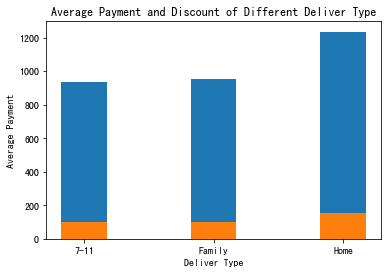

In [53]:
N = 3
totalPaymentMeans = (sevenEleven_avg_payment, family_avg_payment, home_avg_payment)
discountMeans = (-sevenEleven_avg_discount, -family_avg_discount, -home_avg_discount)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, totalPaymentMeans, width)
p2 = plt.bar(ind, discountMeans, width)

plt.ylabel('Average Payment')
plt.xlabel("Deliver Type")
plt.title("Average Payment and Discount of Different Deliver Type")
plt.xticks(ind, ('7-11', 'Family', 'Home'))
plt.show()

In [36]:
pie_lables = ['Finish', 'Overdue', 'Cancel', 'ReturnGoods', 'WaitingToShipping', 'CreditCheckFail']

In [37]:
# 取得不同 deliver type 的交易情況數量
def getStatusDefCounts(statusDef):
    data = eval(statusDef + "_value_counts")
    array = eval(statusDef + "_size")
    for key in pie_lables:
        try:
            array.append(data[key])
        except:
            array.append(0)
            print("no " + key + " key")

In [38]:
sevenEleven_size = []
getStatusDefCounts("sevenEleven")
sevenEleven_size

no CreditCheckFail key


[566187, 46606, 99677, 29572, 119, 0]

In [39]:
family_size = []
getStatusDefCounts("family")
family_size

no CreditCheckFail key


[375253, 34848, 73629, 21857, 75, 0]

In [40]:
home_size = []
getStatusDefCounts("home")
home_size

no Overdue key


[77198, 0, 8419, 10337, 6, 151]

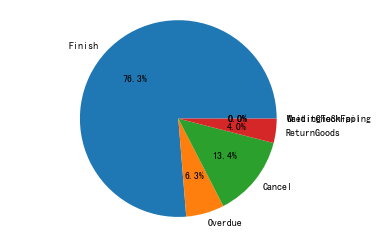

In [41]:
plt.pie(sevenEleven_size , labels = pie_lables, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

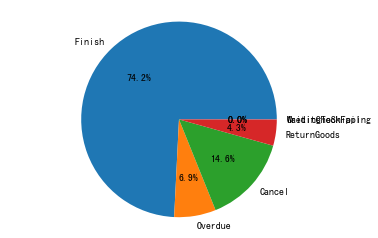

In [42]:
plt.pie(family_size , labels = pie_lables, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

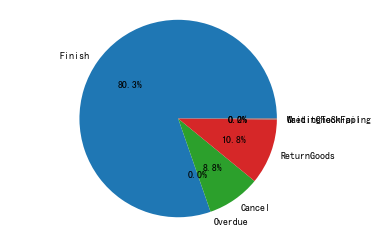

In [43]:
plt.pie(home_size , labels = pie_lables, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

#### bar chart
* 由 bar chart 可看出宅配的單次平均消費金額約1235元，比起超商平均950元大約多出23%
* 折扣金額的佔比超商取貨約是11%，而宅配單次消費平均折扣會達約14%

#### pie chart
* 以交易狀態來看，宅配完成交易的比例最高，達八成，但相對退貨比例也較高，超過一成
* 超商取貨退貨的狀況不多，推測使用超商取貨的人通常較忙，也沒時間處理退貨，但也可能要為了避免退貨麻煩，會直接取消訂單或逾時不取貨，導致這兩類情形佔比逾兩成